In [98]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import mapping
import shapely.speedups
import matplotlib.pyplot as plt
import timeit

# change default figsize 
plt.rcParams['figure.figsize'] = (15, 12)

In [106]:
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')
urban = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_ua10_500k.zip')
bicycles = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/bicycle-crash-data-chapel-hill-region/exports/geojson')
roads = gpd.read_file('https://www2.census.gov/geo/tiger/TIGER2013/PRISECROADS/tl_2013_01_prisecroads.zip')


In [84]:
print(states.crs, urban.crs, bicycles.crs, roads.crs)

{'init': 'epsg:4269'} {'init': 'epsg:4269'} {'init': 'epsg:4326'} {'init': 'epsg:4269'}


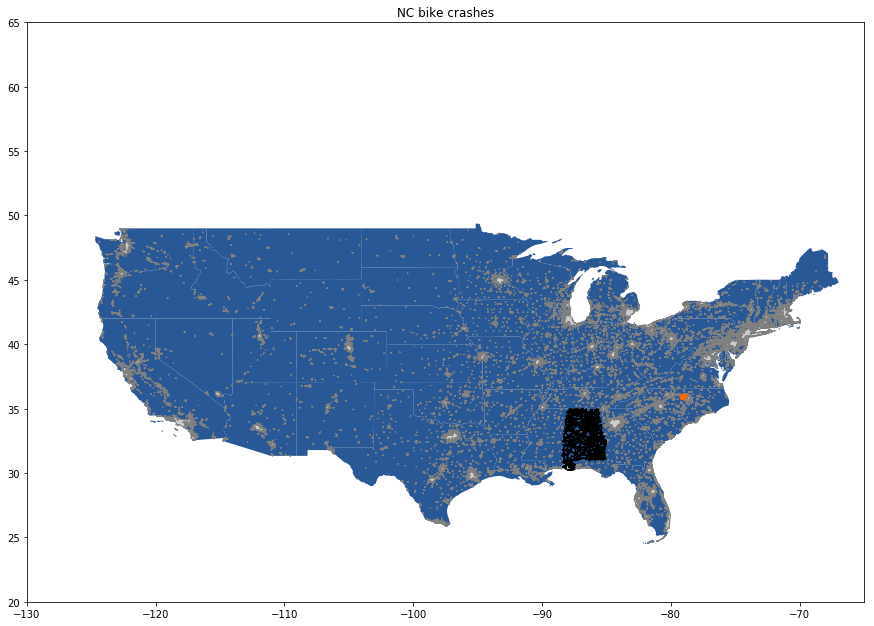

In [113]:
proj_params = '+proj=longlat +datum=WGS84 +no_defs'

states_projected = states.to_crs(proj_params)
urban_projected = urban.to_crs(proj_params)
roads_projected = roads.to_crs(proj_params)

fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

states_projected.plot(ax=ax, color='#295896', linewidth=.4, zorder=1);
urban_projected.plot(ax=ax, edgecolor='gray', color='#cccccc', zorder=2);
roads_projected.plot(ax=ax, edgecolor='black', color='#000000', zorder=3);
bicycles.plot(ax=ax, color='#fd6a05', zorder=4, markersize=8);

ax.set(xlim=(-130,-65), ylim=(20,65));

In [16]:
bicycles.geom_type.unique()

array(['Point'], dtype=object)

In [17]:
print(type(bicycles))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [18]:
print(type(urban_projected))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [19]:
print(type(states_projected))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [86]:
print(type(roads_projected))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [88]:
roads_projected.geom_type.unique()

array(['LineString'], dtype=object)

In [40]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
STATEFP     52 non-null object
STATENS     52 non-null object
AFFGEOID    52 non-null object
GEOID       52 non-null object
STUSPS      52 non-null object
NAME        52 non-null object
LSAD        52 non-null object
ALAND       52 non-null int64
AWATER      52 non-null int64
geometry    52 non-null object
dtypes: int64(2), object(8)
memory usage: 4.1+ KB


In [46]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,02,01785533,0400000US02,02,AK,Alaska,00,1478588231566,277723861311,"(POLYGON ((-173.074642 60.704657, -172.912636 ..."
1,06,01779778,0400000US06,06,CA,California,00,403483182192,20484637928,"(POLYGON ((-118.593969 33.467198, -118.484785 ..."
2,08,01779779,0400000US08,08,CO,Colorado,00,268425964573,1178495763,"POLYGON ((-109.059962 38.499987, -109.05996197..."
3,11,01702382,0400000US11,11,DC,District of Columbia,00,158351639,18675956,"POLYGON ((-77.119759 38.934343, -77.0410179999..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.243027 44.390974, -117.215072 4..."
5,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.50616790862229 40.2006435127951,..."
6,19,01779785,0400000US19,19,IA,Iowa,00,144664158135,1081293682,"POLYGON ((-96.62187499999999 42.779255, -96.57..."
7,21,01779786,0400000US21,21,KY,Kentucky,00,102266092821,2388731561,"POLYGON ((-89.544434 36.57451, -89.47934599999..."
8,22,01629543,0400000US22,22,LA,Louisiana,00,111904803121,23746413153,"POLYGON ((-94.04305152761759 32.6930299766656,..."
9,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.04621299999999 38.025533, -76.0..."


In [59]:
nc = states_projected[states_projected['STATEFP'] == '37']

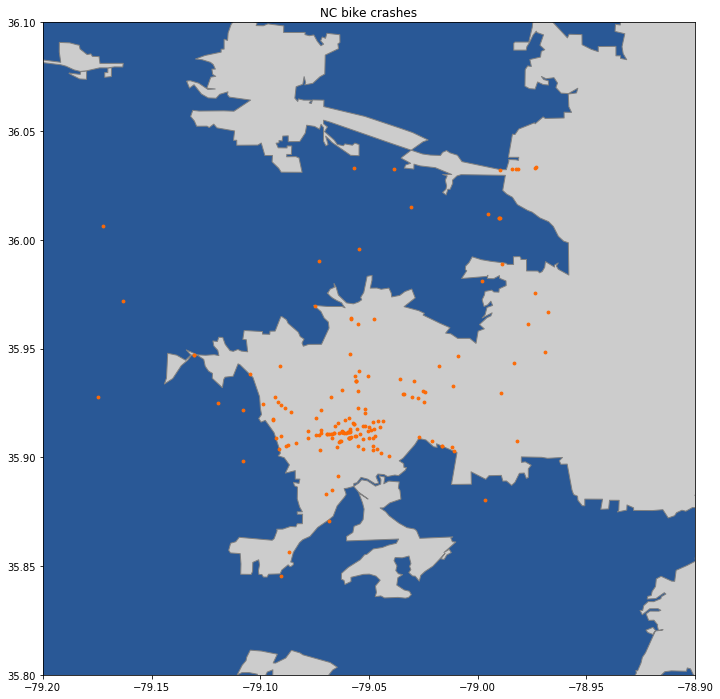

In [111]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

nc.plot(ax=ax, color='#295896', linewidth=.4, zorder=1);
urban_projected.plot(ax=ax, edgecolor='gray', color='#cccccc', zorder=2);
roads.plot(ax=ax, edgecolor='black', zorder=3);
bicycles.plot(ax=ax, color='#fd6a05', zorder=4, markersize=8);

# ax.set(xlim=(-80,-78), ylim=(35,37));

ax.set(xlim=(-79.2,-78.9), ylim=(35.8,36.1));

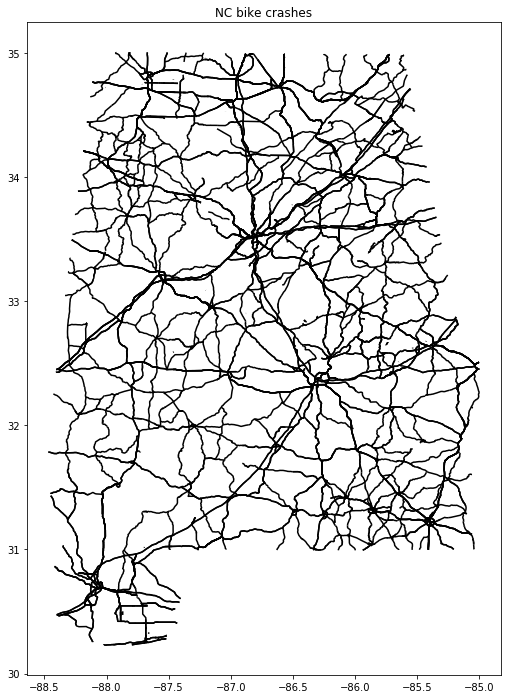

In [92]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)



roads_projected.plot(ax=ax, edgecolor='black', color='#000000', zorder=1);

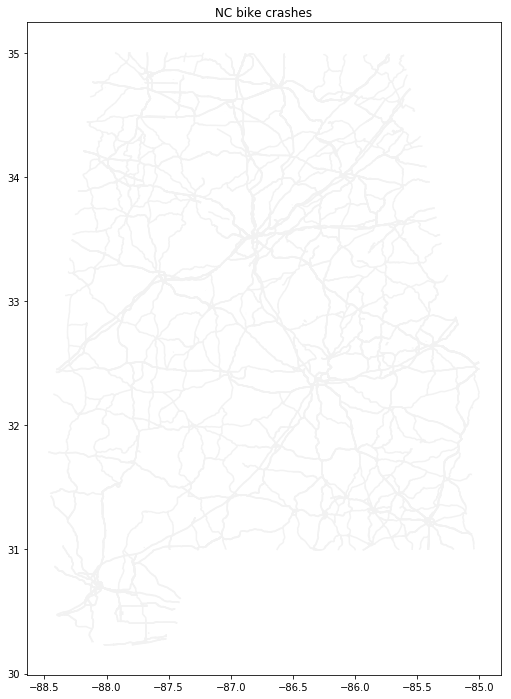

In [108]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)



roads_projected.plot(ax=ax, edgecolor='gray', color='#f2f2f2', zorder=1);